## 과정
1. 변환할 이미지 로드
2. 이미지 사이즈 조절
3. 데이터셋 확인
4. 패치(조각) 이미지 확인하기
5. 이미지 픽셀의 평균값 - 평균값이 낮을수록 검정부분이 많다는 뜻
6. 패치이미지를 어떤 분포를 가지고 있는지 확인
7. 패치이미지의 배경을 하얗게 만들어주기(원래 MNIST 이미지는 까만 배경을 가지고 있기 때문)

## 원리 : 
- 이미지의 각각의 모든 픽셀에 크기가 28x28인 글자를 채운다. 
- 글자 픽셀의 평균값과 이미지의 흑백 픽셀값과 매칭


#### 데이터셋
https://www.kaggle.com/anokas/kuzushiji

# 0. 모듈 불러오기

In [1]:
import cv2#------------------------------------- openCV : 이미지 처리

import matplotlib.pyplot as plt#---------------- matplotlib : 그래프 그리기 or 데이터 그림으로 확인

import numpy as np#----------------------------- numpy : 행렬연산 - 행렬로 이루어진 데이터를 가공하기 위해

import seaborn as sns#-------------------------- seaborn : 그래프 그리기(matplotlib의 상위버전)

from collections import defaultdict#------------ collections : 데이터를 원하는 방식대로 모아주고 개수를 알 수 있음

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict

# 1. 이미지 흑백으로 만들고 사이즈 조절하기


이미지 모자이크를 하기 위해서는 데이터셋이 어떻게 생겼는지 확인을 해야한다. 

데이터셋이 컬러라면 모자이크를 시킬 이미지는 컬러로 두어도 상관없으며 
데이터셋이 흑백이라면 이미지 또한 흑백이어야 한다. 

여기서 사용하려는 데이터셋은 MNIST데이터셋이다. 
모든 MNIST 데이터셋은 검정색 배경에 흰색 글자로 이루어진 흑백형태이다. 그렇기 때문에 <br>
이미지를 흑백으로 만들어주고 데이터셋 적용하는 시간을 단축하기 위해 사이즈를 확인 후 필요시 줄여준다.

(85, 128)


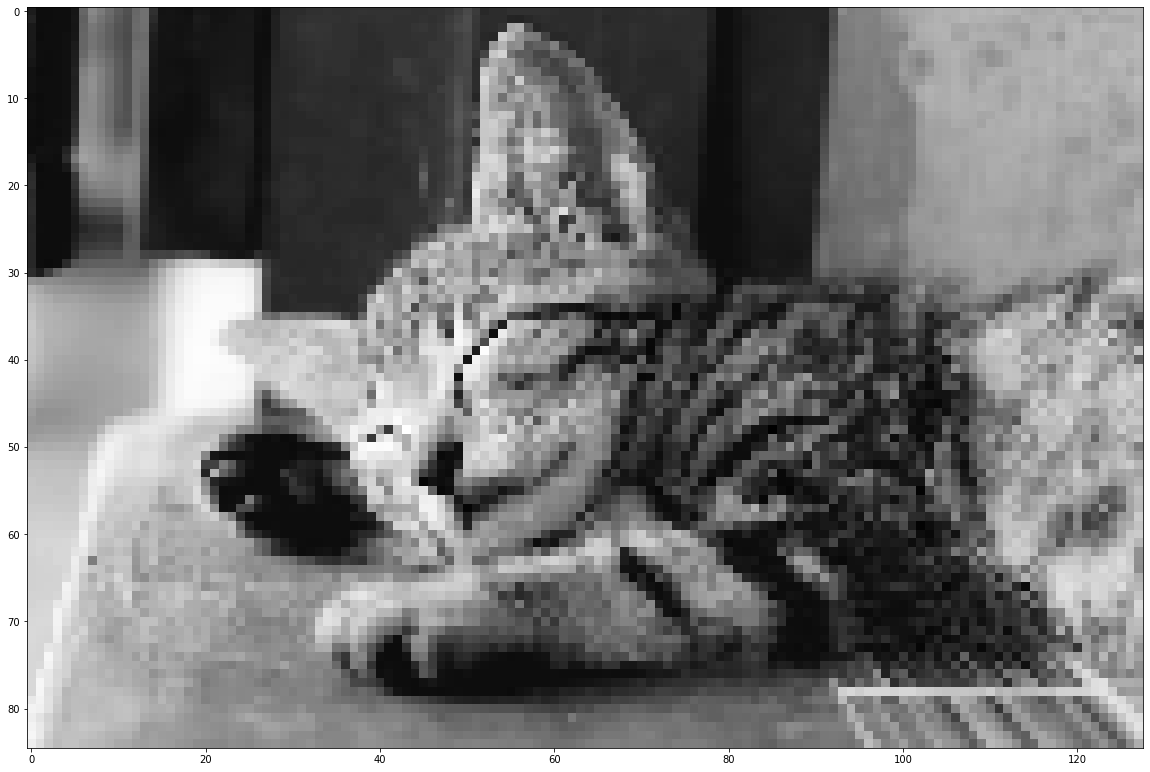

In [3]:
#1-1 적용시킬 이미지의 경로를 변수로 저장해준다.
img_path = 'img/04.jpg' 

#1-2 적용시킬 이미지를 읽어오기
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

#1-3 이미지 사이즈 조절하기
img = cv2.resize(img, dsize = None, fx = 0.2, fy = 0.2)

#1-4 이미지 형태(사이즈) 확인
print(img.shape) 

#5 변형된 이미지 출력하기
plt.figure(figsize = (20,20))
plt.imshow(img, cmap = 'gray')

# 2. 데이터셋 불러오기


앞서 이미지 모자이크를 하기 위해서는 데이터셋이 어떻게 생겼는지 확인을 해야한다고 하였고 적용시키기 위해 데이터셋을 변형시켜주어야 한다.<br>
데이터셋을 불러오고 하나의 데이터의 크기를 알아보고 형태를 heatmap을 통해 살펴보자.

In [4]:
#2-1 글자 데이터셋 불러오기
dataset_images = np.load('dataset/k49-train-imgs.npz')['arr_0']
print('전체 데이터 크기 : ',dataset_images.shape)
print('데이터 한 개의 크기 : ',dataset_images[0].shape)
print('데이터 한 개의 배열 : ')
print(' ') 
print(dataset_images[0])

전체 데이터 크기 :  (232365, 28, 28)
데이터 한 개의 크기 :  (28, 28)
데이터 한 개의 배열 : 
 
[[  0   0   0   0   0   0   0   0  14 141 236 181  56   6   0   3   0   4
    3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   3  10  61  15  31 200 252 114   8   0   0   0  11  24   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   4   1  64 187  91 208 255 210 110 128  53   0   0 103 246 163
  108  68   5   0   0   0   0   0   0   0]
 [  0   0   2   1  20 197 253 255 251 227  71 172  34   1   0 132 255 255
  255 255  98   0   0   0   0   0   0   0]
 [  0   0   0   0   1 119 255 255 255 254 188  47  50  74 125 230 255 255
  224  78   4   0   0   0   0   0   0   0]
 [  0   0   0   1   3 157 255 255 255 251 190  40 130 228 255 255 255 245
   28   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1  19 236 255 165 238 161   1 124 249 255 252 244 255 243
    9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2  85 255 206   8  23   3 106 250 244 180  45  62 255 253
  117  48   8   0   0   0   0   0   

# 3. 데이터 한 개를 히트맵으로 출력하기


heatmap으로 데이터가 실제로 어떻게 생겼는지를 확인해보자.

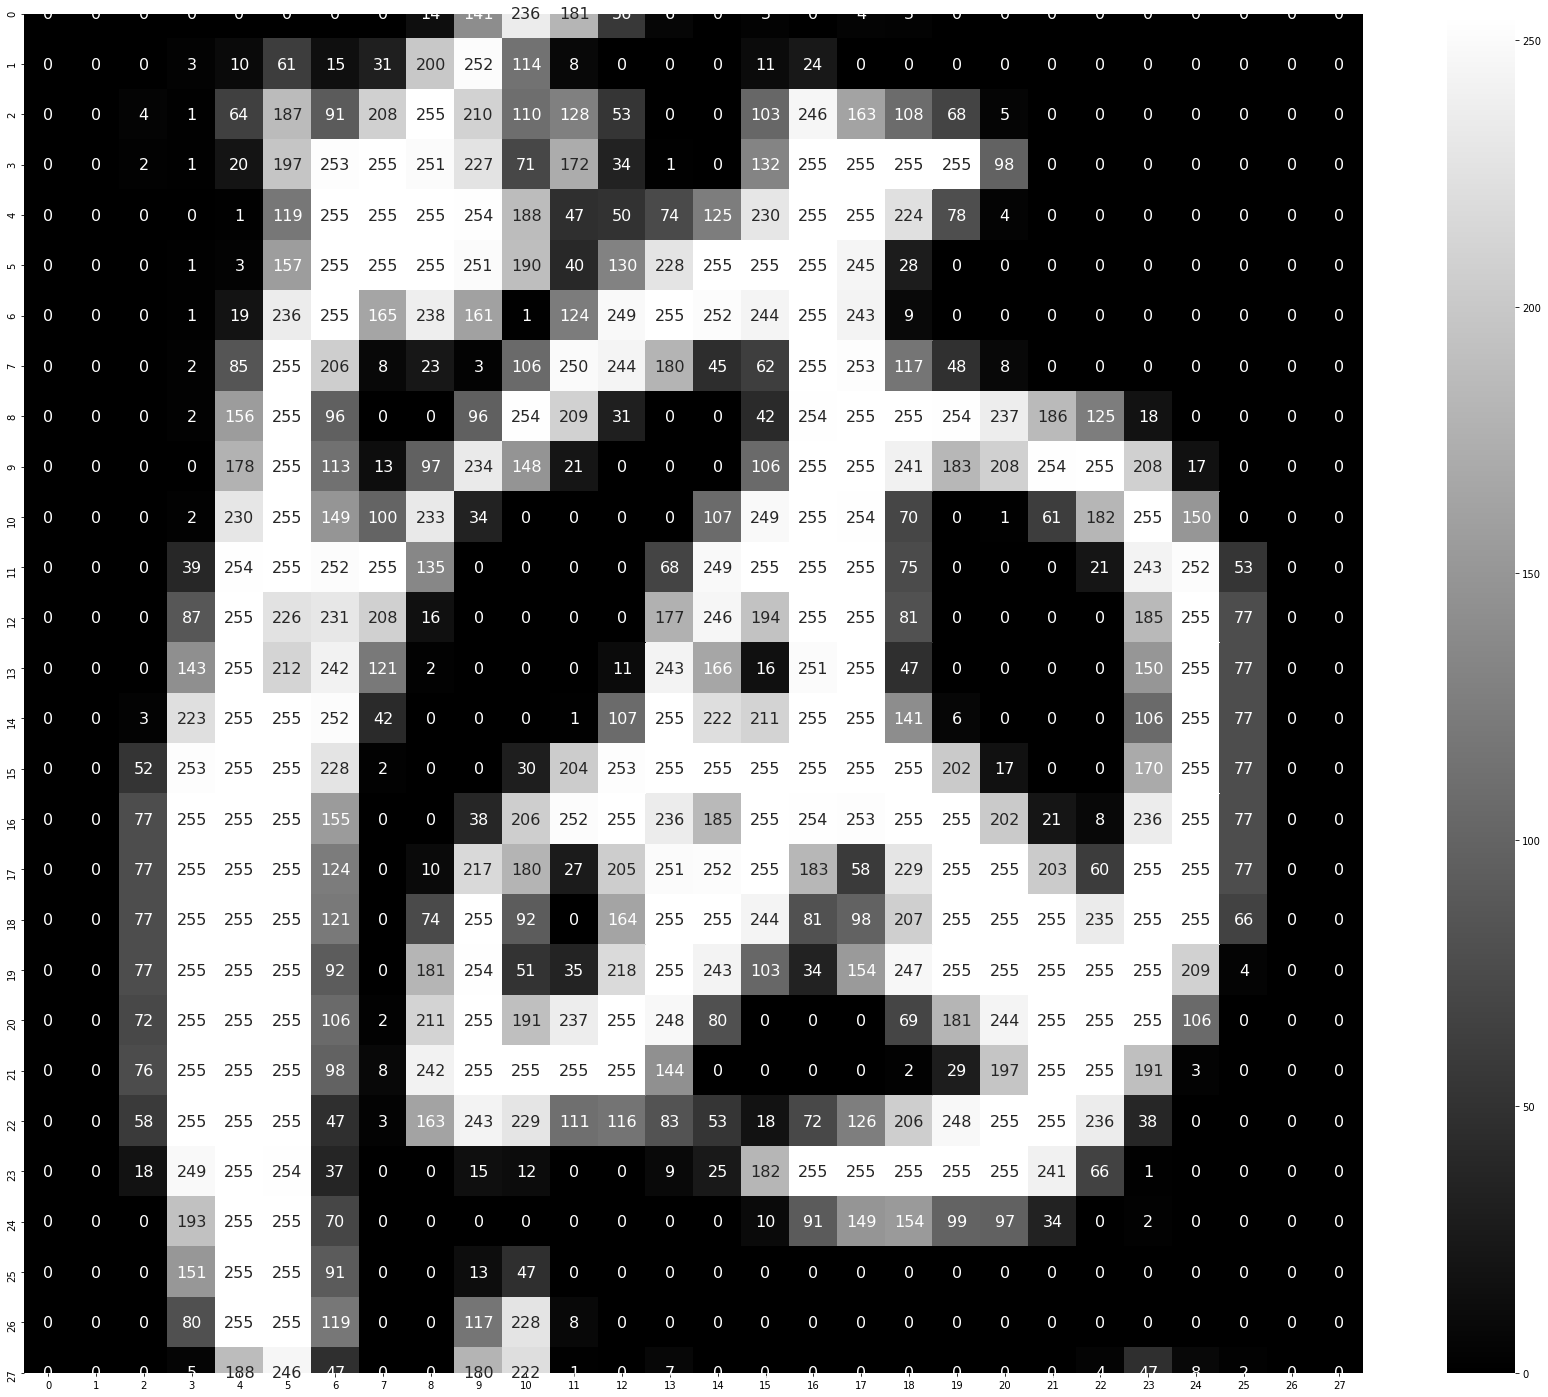

In [5]:
#3-1 HeatMap그리기
plt.figure(figsize=(30,25))
sns.heatmap(dataset_images[0], cmap = 'gray', annot = True, fmt="d", annot_kws={'size':16})
plt.show()

# 4. 데이터셋에서 데이터마다 평균값 구하기 / 평균값 분포 그리기 with 히스토그램 


데이터 한 개에서 컬러가 0~255인 픽셀이 28 X 28개가 있다는 것을 확인했다. 데이터 한 개에서 픽셀들의 평균값을 구하면 글자이미지에서 흰색이 많은지 검정이 많은지를 알 수 있다. 그 평균값으로 흑백으로 변환한 모자이크할 이미지의 픽셀들과 매칭시킬 수 있다.

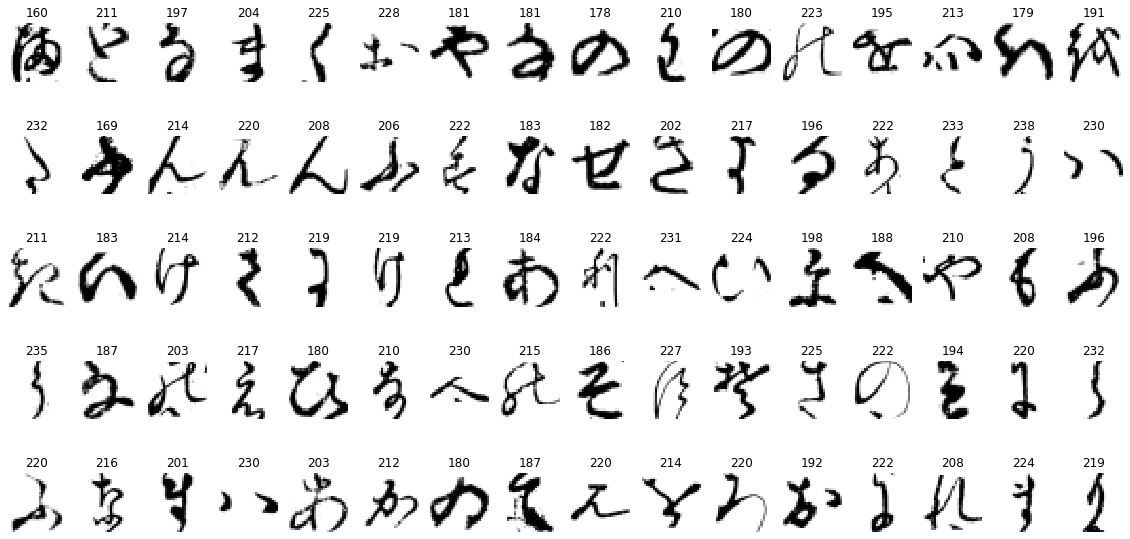

In [6]:
#4-1 데이터 셋 평균값 구하고 나열하기
plt.figure(figsize = (20,10))
for i in range(80):
    img_patch = 255 - dataset_images[i]
    
    plt.subplot(5,16,i+1)
    plt.title(int(np.mean(img_patch)))
    plt.axis('off')
    plt.imshow(img_patch, cmap='gray')

<function matplotlib.pyplot.show(*args, **kw)>

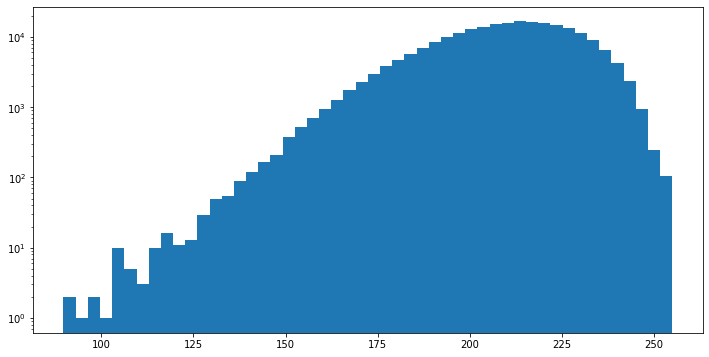

In [7]:
#4-2 평균값 분포 구하기
means = np.mean(255 - dataset_images, axis=(1,2))
plt.figure(figsize = (12,6))
plt.hist(means, bins = 50, log = True)
plt.show

In [8]:
means.shape

(232365,)

# 5. 노멀라이즈 - 기준이 서로 다른 값을 같은 기준이 되게 만드는 것

영상분야에서는 노멀라이즈를 픽셀 값들이 0-255에 골고루 분포하지 않고 특정 영역에 몰려있는 경우 화질을 개선하기도 하고 영상 간의 연산을 해야하는데, 조건이 서로 다른 경우 같은 조건으로 만들어주는데 사용한다.

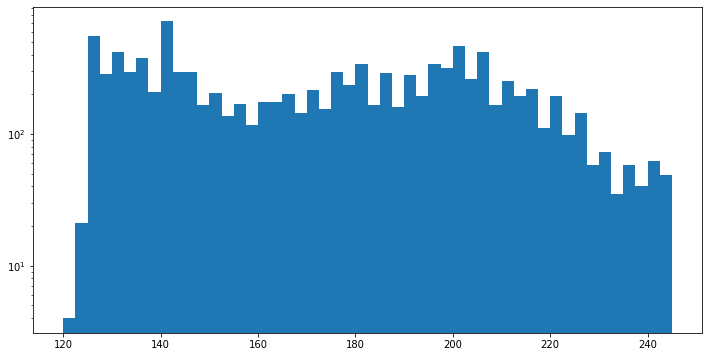

In [9]:
#5-1 노멀라이즈 후에 히스토그램으로 표현하기
img = cv2.normalize(img, dst=None, alpha=120, beta=245, norm_type=cv2.NORM_MINMAX)

plt.figure(figsize=(12, 6))
plt.hist(img.flatten(), bins=50, log=True)
plt.show()

# 6. 0-255 항목에 속하는 글자 넣어서 저장하기

이미지와 글자를 매칭시키기 위해서 다시 0-255 범위로 분포된 평균값에 맞춰 글자별로 정리할 필요가 있다. 이 때 collection 모듈의 defaultdict를 사용하면 편리하다.

In [10]:
#6-1 defaultdict(list) 사용하기
bins = defaultdict(list)

for img_patch, mean in zip(dataset_images, means):
    bins[int(mean)].append(img_patch)

# 7. 데이터셋과 이미지 매칭하기
빈 공간의 이미지를 만들어 준 뒤에 변환할 이미지의 픽셀값과 평균값에 맞는 데이터를 매칭시킨다.

In [11]:
#변환할 이미지의 가로, 세로 길이 저장
img.shape
h, w = img.shape# h: height = 85 w: width = 128

In [12]:
#변환할 이미지 영행렬로 공간 만들어주기
img_out = np.zeros((h*28, w*28), dtype = np.uint8)
print(img_out)
print('----------------------')
print(img_out.shape) #(2380, 3584) = (85*28, 128*28)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
----------------------
(2380, 3584)


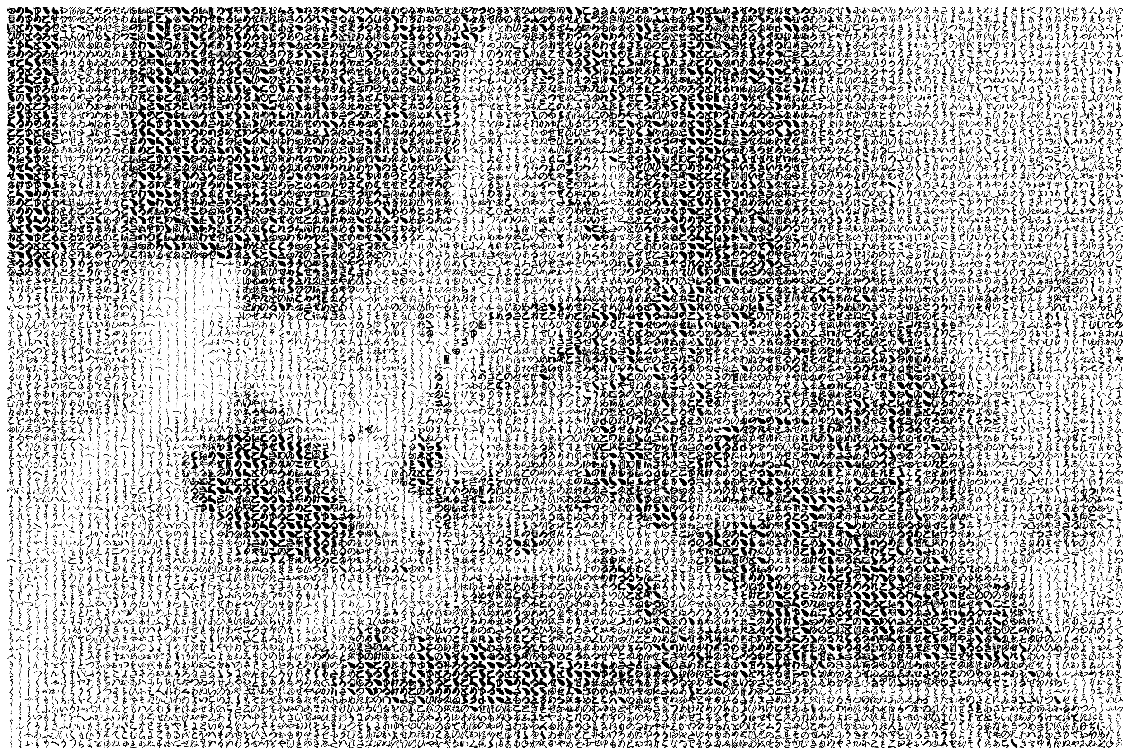

In [13]:
#빈행렬에 이미지 픽셀값과 맞는 글자 데이터 채워주기
for y in range(h): 
    for x in range(w):
        level = img[y][x]

        b = bins[level]

        while len(b) == 0:
            level += 1
            b = bins[level]

        img_patch = 255 - b[np.random.randint(len(b))]

        img_out[y*28:(y+1)*28, x*28:(x+1)*28] = img_patch
        
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(img_out, cmap='gray')

_ = cv2.imwrite('result/%s_bw.jpg', img_out)